In this Kernel we will look at the E commerce data.We will do an exploratory data analysis and get insights from the data.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ecommerce-data/data.csv


**Importing Python Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import pandas_profiling
import gc
import datetime
plt.style.use('ggplot')

**Importing and Displaying Data**

In [3]:
df=pd.read_csv('../input/ecommerce-data/data.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Checking missing values**

In [5]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

We have many data missing for the columns customer ID and Description

**Check out the rows with Missing Values**

In [6]:
df[df.isna().any(axis=1)].head(10)
#df[df.isnull.any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom


**Changing Invoice Date Format**

In [7]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate,format='%m/%d/%Y %H:%M')

In [8]:
#df.info()

**Dropping missing values**

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

**Change the column type from String to Integer**

In [11]:
df['CustomerID']=df['CustomerID'].astype('int64')

In [12]:
#df.info()

**Making copy of dataframe**

In [13]:
df2=df.copy()

In [14]:
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


**Quantity**

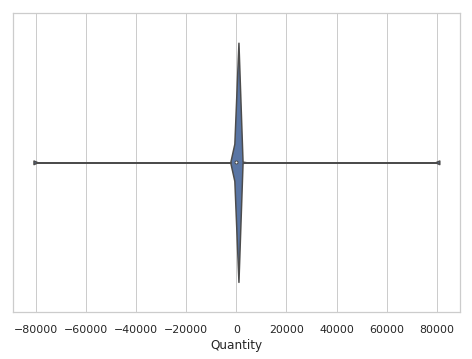

In [15]:
sns.set(style='whitegrid')
ax=sns.violinplot(x=df2['Quantity'])

We can see there are negative values in Quantity.This is possible when Items are given back.We need to Drop this negative Outliers from our Dataset

**Removing Outlies from Quantity**

In [16]:
df2=df2[df2.Quantity>0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


So the minimum value for us in the quantity is 1 so we have managed to remove outlier from out dataset

**Lets Calculate the Amount Spend by a customer**

In [17]:
df2['AmountSpent']=df2['Quantity']*df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**Adding Month,Day and Hour Columns to our dataset**

In [18]:
#import datetime
df2['month_year']=pd.to_datetime(df2['InvoiceDate']).dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [19]:
L=['year','month','day','dayofweek','dayofyear','weekofyear','quarter']
df2=df2.join(pd.concat((getattr(df2['InvoiceDate'].dt,i).rename(i) for i in L),axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [20]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

We can see that the day of the week starts with 0 as Sunday 

**Make Day of Week Starting with Monday as 1**

In [21]:
df2['dayofweek']=df2['dayofweek']+1

In [22]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


**Sales by customer and Country**

In [23]:
sales_per_cust=df2.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False)
sales_per_cust.columns=['CustomerID','Country','NumberofSales']
sales_per_cust.head()

,CustomerID,Country,NumberofSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


**Sales for All Customers**

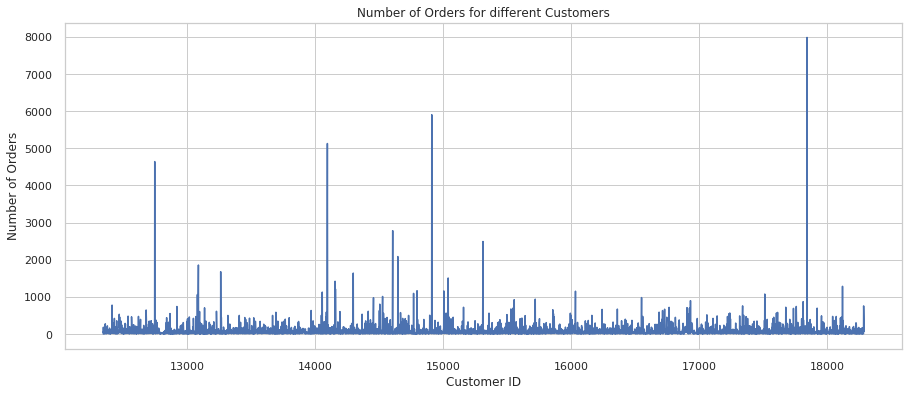

In [24]:
orders=df.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID,orders.InvoiceNo);
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.ioff()

They long bars indicate the customers that make the highest sale by Volume

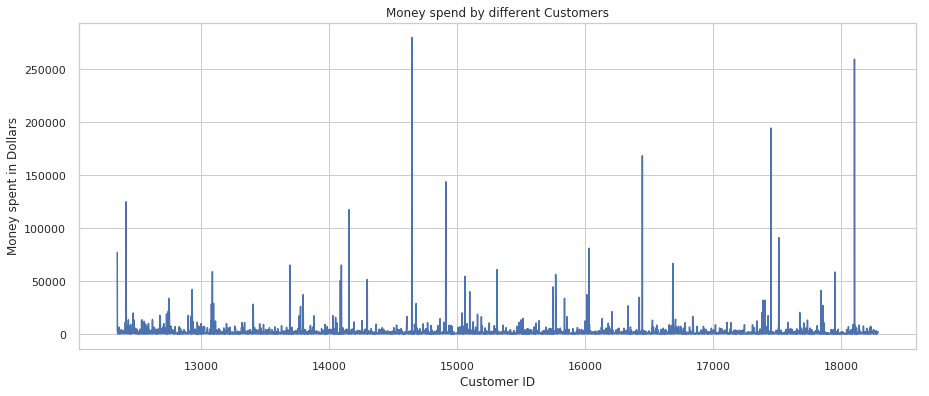

In [25]:
orders=df2.groupby(by=['CustomerID','Country'],as_index=False)['AmountSpent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID,orders.AmountSpent);
plt.xlabel('Customer ID')
plt.ylabel('Money spent in Dollars')
plt.title('Money spend by different Customers')
plt.ioff()

So now we have the info of he customers spending the highest amount.This customers are important for us.They drive the business revenue.

**Lets findout the Customer ID of highest spending Customers**

In [26]:
spent_per_cust=df2.groupby(by=['CustomerID','Country'],as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent',ascending=False)
#spent_per_cust.columns=['CustomerID','Country','TotalSpent']
spent_per_cust.head(10)

,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


In [27]:
df2.insert(loc=2,column='year_month',value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df2.insert(loc=5,column='hour',value=df2.InvoiceDate.dt.hour)

**Number of orders per month**

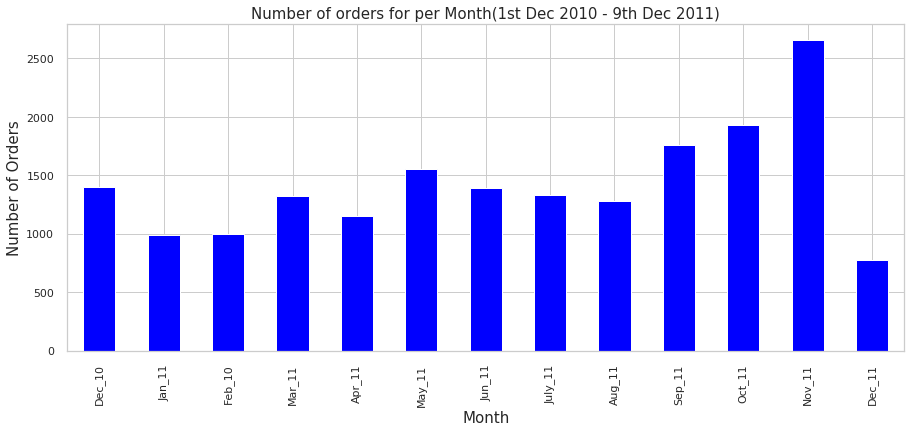

In [28]:
ax=df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_10','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'));

We can see that the Peak Sales are happening in Month of November.

**Orders Per Week**

In [29]:
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

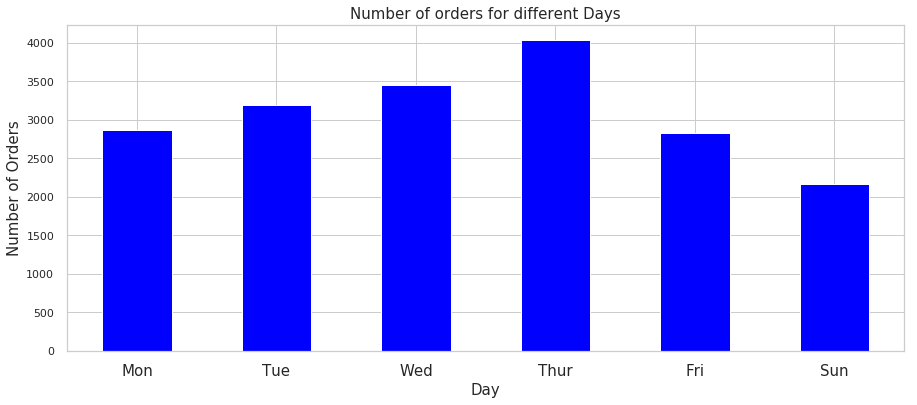

In [30]:
ax=df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'),rotation='horizontal',fontsize=15);

Highest sale is taking place on thursday and Saturday seems to be Holiday

Order by time of the Day

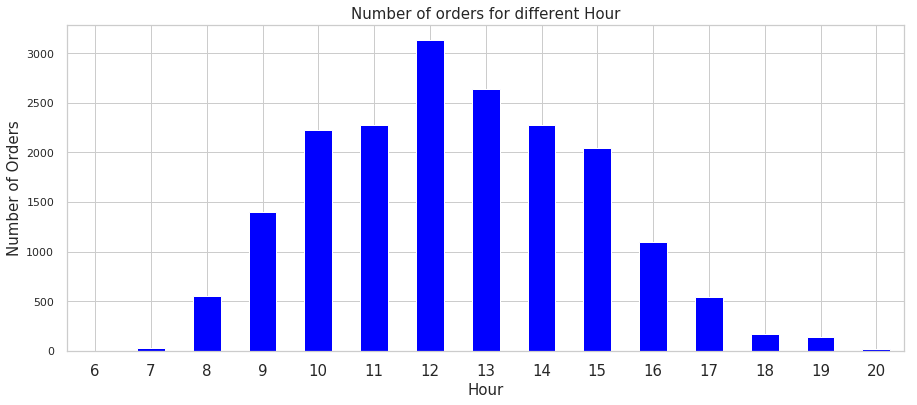

In [31]:
ax=df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hour',fontsize=15)
ax.set_xticklabels(range(6,21),rotation='horizontal',fontsize=15);
plt.show()

More sale happends in the Afternoon.We can allot resources accordingly to cater to everyday needs.

**Sales Per week of the Year**

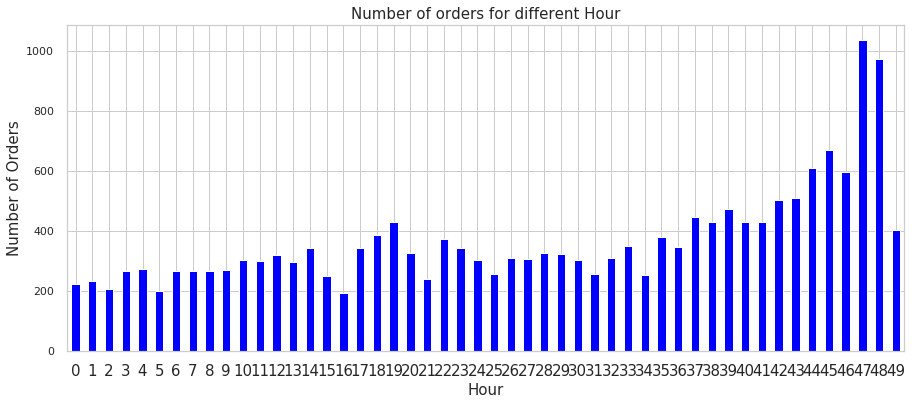

In [32]:
ax=df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color='blue',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hour',fontsize=15)
ax.set_xticklabels(range(0,52),rotation='horizontal',fontsize=15);
plt.show()

Again we can see that more sale is Happening in the End of November

**Analysis Unit Price of our items**

In [33]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

**Distribution of Unit Price**

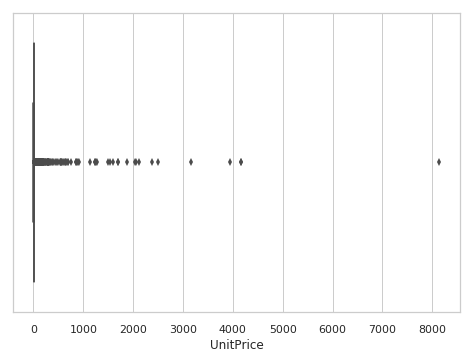

In [34]:
#plt.subplot(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

Most items are below 600 Dollars but there are some outliers upto the price range of 8000 Dollars

**Which items are Free?**

In [35]:
df_free=df2[df2.UnitPrice==0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


Above items are given as free of cost to the customers

**When are items given for Free?**

In [36]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

**Plotting the above data******

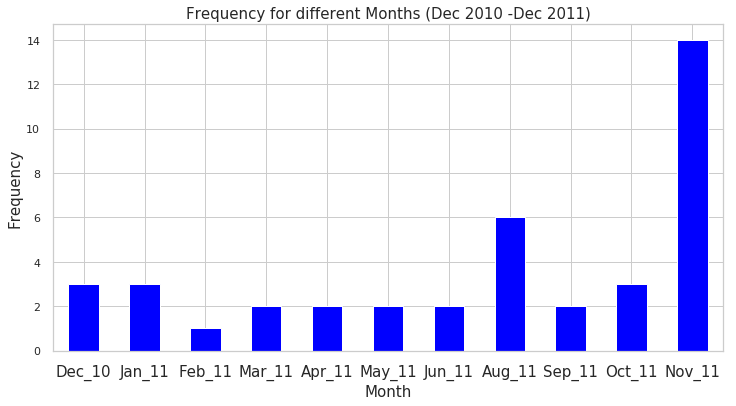

In [37]:
ax=df_free.year_month.value_counts().sort_index().plot('bar',figsize=(12,6),color='blue')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 -Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','Aug_11','Sep_11','Oct_11','Nov_11'),rotation='horizontal',fontsize=15);
plt.show()

So Free items are given away more in the month of November.On an average 2-3 items are given out free every month.

**Analysis Per country**

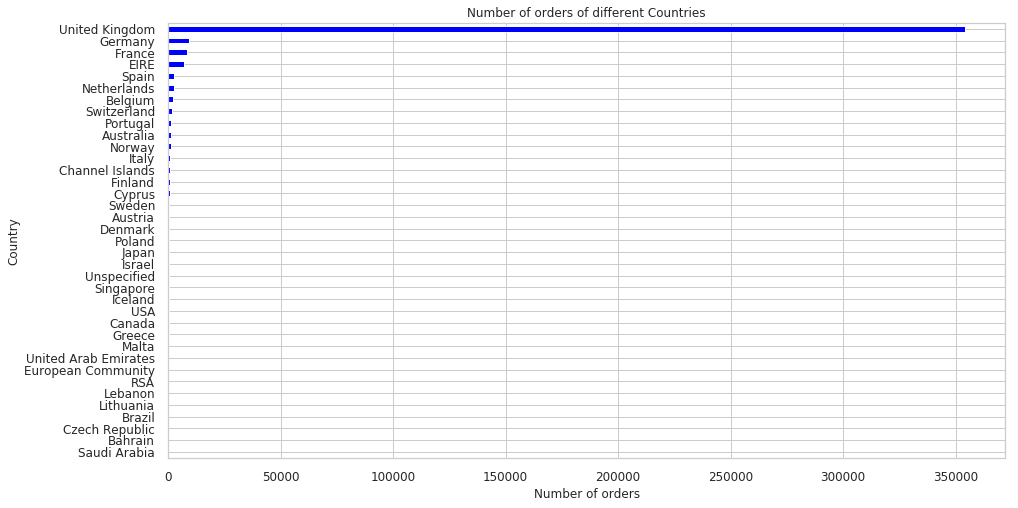

In [38]:
group_country_orders=df2.groupby('Country')['InvoiceDate'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh',fontsize=12,color='blue');
plt.xlabel('Number of orders',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of orders of different Countries',fontsize=12)
plt.ioff()

We see that UK by far has the highest number of orders.To get better representation of other countries we need to drop the UK data and then make a plot.

**Excluding UK Now**

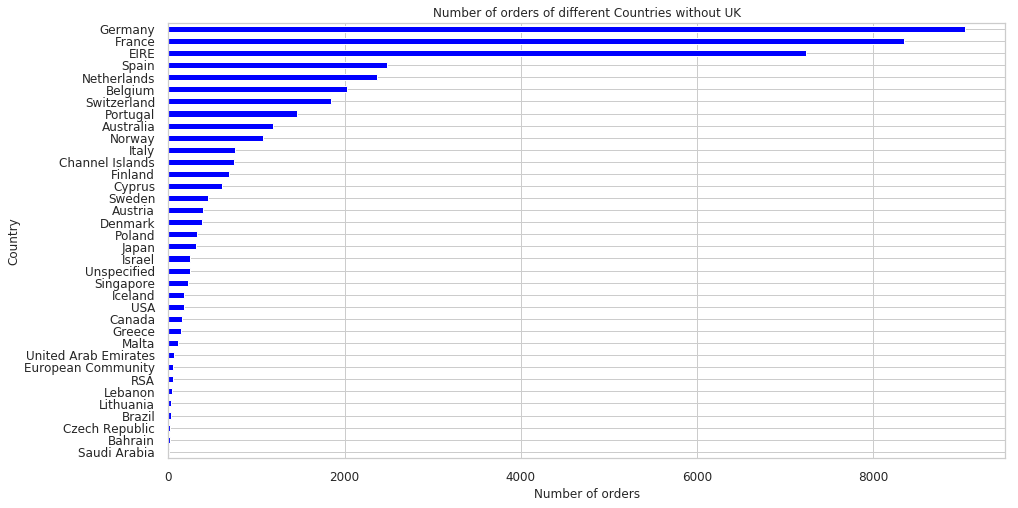

In [39]:
group_country_orders=df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk=group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

#plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot('barh',fontsize=12,color='blue');
plt.xlabel('Number of orders',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of orders of different Countries without UK',fontsize=12)
plt.ioff()

Germany,Netherland and Ireland are other countries that have high Sales in terms of items sold.

**Repeat Customers**

In [40]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(),df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011 we're taking all the transcations that ocurred before December 01,2011
df2=df2.loc[df2['InvoiceDate']<'2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [41]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df=df2.groupby(by=['InvoiceNo','InvoiceDate']).agg({'AmountSpent':sum,'CustomerID':max,'Country':max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [42]:
# Sort on Amount spent,this gives us largest invoices 
invoice_customer_df.sort_values(by='AmountSpent',ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [43]:
#
#
monthly_repeat_customers_df=invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x: len(x)>1).resample('M').nunique()['CustomerID']
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

**Number of Unique Customers per month**

In [44]:
monthly_unique_customer_df=df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customer_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [45]:
monthly_repeat_customers_df=invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x)>1).resample('M').nunique()['CustomerID']
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [46]:
monthly_repeat_percentage=monthly_repeat_customers_df/monthly_repeat_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    100.0
2011-01-31    100.0
2011-02-28    100.0
2011-03-31    100.0
2011-04-30    100.0
2011-05-31    100.0
2011-06-30    100.0
2011-07-31    100.0
2011-08-31    100.0
2011-09-30    100.0
2011-10-31    100.0
2011-11-30    100.0
Freq: M, Name: CustomerID, dtype: float64

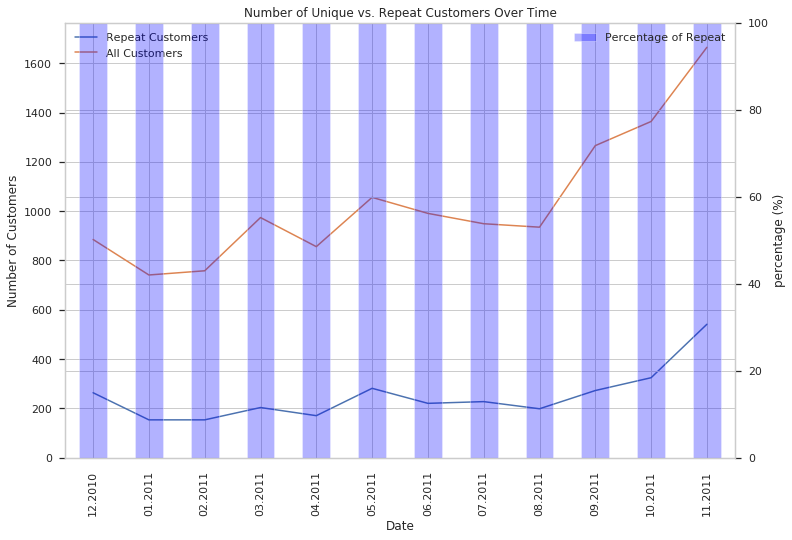

In [47]:
#Plotting this visully
#Note were using a 2 scale y axis (left and right)

ax=pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))
pd.DataFrame(monthly_unique_customer_df.values).plot(ax=ax,grid=True)

ax2=pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers','All Customers'])
ax2.legend(['Percentage of Repeat'],loc='upper right')

ax.set_ylim([0,monthly_unique_customer_df.values.max()+100])
ax2.set_ylim([0,100])

plt.xticks(range(len(monthly_repeat_customers_df.index)),[x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],rotation=45)
plt.show()

**Relation between Repeat customer and Revenue**

In [48]:
monthly_revenue_df=df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()
monthly_rev_repeat_customer_df=invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),'CustomerID']).filter(lambda x:len(x) > 1).resample('M').sum()['AmountSpent']

monthly_rev_per_repeat_customers_df=monthly_rev_repeat_customer_df/monthly_revenue_df*100
monthly_rev_per_repeat_customers_df


InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

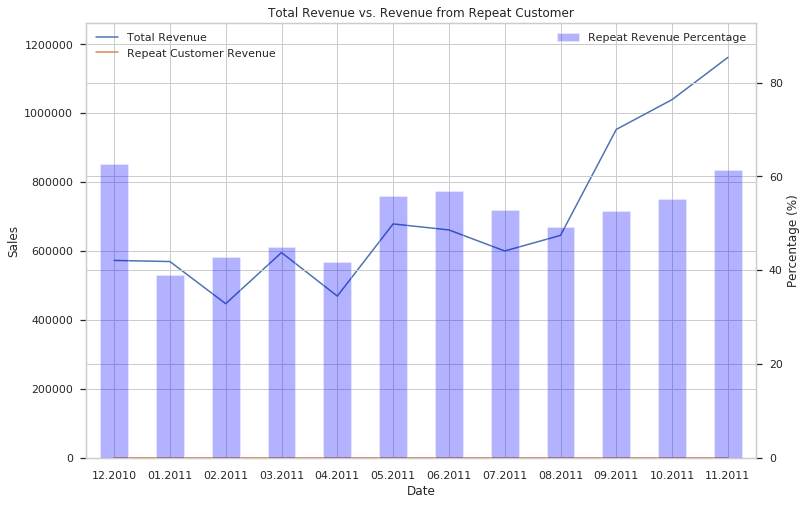

In [49]:
#Plotting this visully
#Note were using a 2 scale y axis (left and right)

ax=pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))
pd.DataFrame(monthly_rev_per_repeat_customers_df.values).plot(ax=ax,grid=True)

#ax2=pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customer')

ax.legend(['Total Revenue','Repeat Customer Revenue'])
ax.set_ylim([0,max(monthly_revenue_df.values)+100000])
ax2=ax.twinx()

pd.DataFrame(monthly_rev_per_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)
ax2.set_ylim([0,max(monthly_rev_per_repeat_customers_df.values)+30])
ax2.set_ylabel('Percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_per_repeat_customers_df.index]);